## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# Get 5 year's worth of historical price data
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
        
).df

# Display sample data
df_tickers.head()

NKE                                      T  \
                            open    high    low  close    volume   open   
time                                                                      
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201  39.30   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816  39.47   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946  38.95   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280  39.24   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392  39.09   

                                                                XOM         \
                              high    low    close    volume   open   high   
time                                                                         
2016-05-12 00:00:00-04:00  39.6665  39.20  39.5600  15796926  89.80  89.93   
2016-05-13 00:00:00-04:00  39.5200  39.11  39.1463  13723184  89.28  89.66   
2016-05-16 00:00:00-04:00  39.2988  38.90  39.2800  12318580  89.20  89.67   
2016-05-17 00:00:00-04:00  39.3300  39.00  39.1000  17858661  89.27  89.91   
2016-05-18 00:00:00-04:00  39.1500  38.27  38.4400  22339324  89.80  90.00   

                                                    
                             low    close   volume  
time                                                
2016-05-12 00:00:00-04:00  89.15  89.6799  8639479  
2016-05-13 00:00:00-04:00  88.51  88.6500  7369897  
2016-05-16 00:00:00-04:00  89.00  89.5600  6411291  
2016-05-17 00:00:00-04:00  89.16  89.5200  7204222  
2016-05-18 00:00:00-04:00  88.65  89.3300  7582643

### Simulate five year portfolio growth with evenly-distributed stock investments

In [5]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5

)
# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [6]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000968,1.002317,0.993147,1.001700,0.996404,1.003678,1.017739,1.004704,1.001616,0.988014,...,0.991589,0.997729,1.000644,1.009148,1.011073,1.008299,0.998623,0.990298,0.995799,0.991549
2,1.009592,1.009378,0.994303,0.992175,1.002433,1.009867,1.020629,1.005833,0.996792,0.995193,...,1.003282,0.993613,0.998567,1.007686,1.027425,1.003852,1.002413,0.984884,0.982975,0.981675
3,1.021886,1.016278,0.996681,1.002217,0.999141,1.010013,1.019570,1.008019,1.003416,0.995675,...,1.008170,0.990117,0.996130,1.011814,1.030596,1.011033,1.020184,0.990796,0.977254,0.988331
4,1.008884,1.015049,0.988853,0.987134,0.991572,0.998194,1.019061,0.996832,1.026085,1.016263,...,1.003528,0.982541,0.998015,1.017099,1.013670,1.005059,1.018152,0.974957,0.967072,0.961259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.909055,0.528990,1.164729,0.707593,1.000391,0.829349,0.937068,0.980924,0.979314,0.709752,...,0.984932,0.917189,0.792783,1.028514,0.770226,1.000256,0.795164,0.862279,1.116651,1.015127
1257,0.902469,0.528317,1.160451,0.715642,1.009012,0.826625,0.930787,0.985112,0.972156,0.702854,...,0.984504,0.912981,0.801352,1.051841,0.783523,0.998688,0.810460,0.871574,1.113838,1.012425
1258,0.904450,0.531634,1.163632,0.706771,0.997505,0.835427,0.939735,0.997820,0.983356,0.696668,...,0.989997,0.911669,0.795563,1.050952,0.789290,0.991980,0.814909,0.884834,1.116358,1.008189
1259,0.900067,0.530711,1.158531,0.713376,1.002841,0.840999,0.942723,0.984358,0.985037,0.699762,...,0.985478,0.912834,0.797055,1.046433,0.786814,0.980847,0.825079,0.884355,1.109283,0.992010


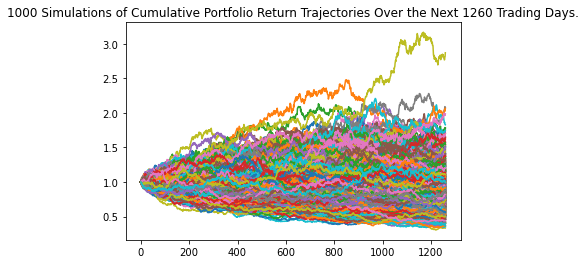

In [7]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

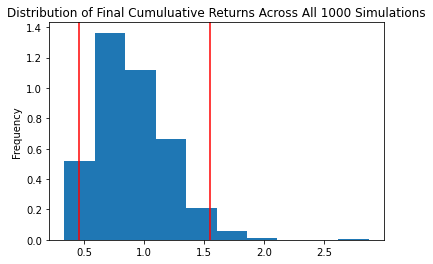

In [8]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               0.896891
std                0.294530
min                0.334031
25%                0.676438
50%                0.858316
75%                1.078619
max                2.871312
95% CI Lower       0.454880
95% CI Upper       1.545012
Name: 1260, dtype: float64


In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments stocks
even_ci_lower = round(even_tbl[8] * 15000, 2)
even_ci_upper = round(even_tbl[9] * 15000, 2)

# Print results
print(even_ci_lower)
print(even_ci_upper)

6823.21
23175.18


### Simulate five year portfolio growth with 60% AT&T stock

In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.2, .6, .2],
    num_simulation = 1000,
    num_trading_days = 252 * 5
)

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [12]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998352,1.009472,1.004721,1.006339,1.009952,1.019756,0.981664,0.987583,0.997222,1.014403,...,1.008270,0.991548,0.999870,0.993344,1.006279,1.012794,0.998080,1.015718,1.022551,0.990365
2,0.993218,1.016759,1.023225,1.023337,0.992608,1.000458,0.990292,0.984751,1.009947,1.025627,...,1.009774,0.993639,1.016659,0.998809,1.006938,0.996949,1.000018,1.005056,1.026764,1.011299
3,0.993190,1.013352,1.017287,1.030693,1.004354,1.006913,0.984261,0.991528,1.011490,1.009437,...,1.002064,0.991816,1.015668,1.004324,0.987603,0.984857,0.997787,1.018525,1.014814,0.993502
4,0.983617,1.021280,1.012564,1.051980,1.013414,1.006705,0.981748,1.002465,1.022722,1.007022,...,0.997489,0.977221,1.021557,1.001848,0.959172,0.990345,0.997317,1.001590,1.005628,1.001705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.130179,0.814501,1.069640,1.611299,1.192601,0.899178,0.600601,1.141912,0.563610,0.601582,...,0.583446,0.667260,0.669018,1.204322,0.876466,0.458676,0.785330,0.917962,0.675183,0.736145
1257,1.127805,0.815623,1.073212,1.607330,1.197142,0.913426,0.603885,1.114042,0.557519,0.589232,...,0.591403,0.660071,0.681787,1.182457,0.865838,0.459652,0.785648,0.911085,0.676982,0.726204
1258,1.134392,0.817507,1.073854,1.603764,1.217935,0.907108,0.609793,1.108185,0.567050,0.586603,...,0.597706,0.651841,0.681188,1.155895,0.856880,0.461253,0.799019,0.915350,0.669379,0.713969
1259,1.125951,0.813819,1.096396,1.583579,1.186107,0.905016,0.612851,1.107096,0.577782,0.596237,...,0.592341,0.657514,0.681173,1.145674,0.853664,0.456945,0.793444,0.911877,0.668882,0.721050


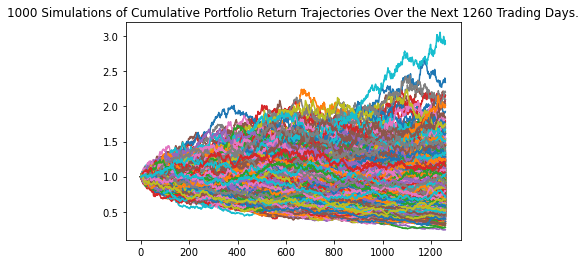

In [13]:
# Plot simulation outcomes
att_line_plot = MC_att.plot_simulation()

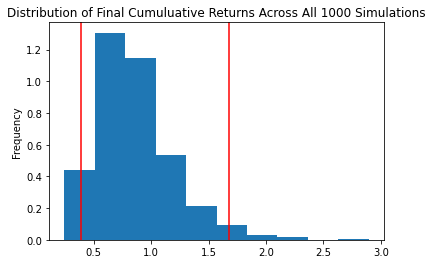

In [14]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_att.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               0.859415
std                0.332253
min                0.244748
25%                0.627111
50%                0.805887
75%                1.024027
max                2.893369
95% CI Lower       0.387929
95% CI Upper       1.675905
Name: 1260, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8] * 15000, 2)
att_ci_upper = round(att_tbl[9] * 15000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")


There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $5818.93 and $25138.57.


### Simulate five year portfolio growth with 60% Nike stock

In [18]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.6, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252 * 5
)


# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2016-05-12 00:00:00-04:00  57.52  58.340  57.31  58.00   7123201          NaN   
2016-05-13 00:00:00-04:00  57.74  58.120  57.28  57.30   6459816    -0.012069   
2016-05-16 00:00:00-04:00  57.27  57.530  56.63  57.14   7121946    -0.002792   
2016-05-17 00:00:00-04:00  57.15  57.375  56.65  57.10   6292280    -0.000700   
2016-05-18 00:00:00-04:00  56.76  56.870  55.67  56.11  10106392    -0.017338   

                               T                                     \
                            open     high    low    close    volume   
time                                                                  
2016-05-12 00:00:00-04:00  39.30  39.6665  39.20  39.5600  15796926   
2016-05-13 00:00:00-04:00  39.47  39.5200  39.11  39.1463  13723184   
2016-05-16 00:00:00-04:00  38.95  39.2988  38.90  39.2800  12318580   
2016-05-17 00:00:00-04:00  39.24  39.3300  39.00  39.1000  17858661   
2016-05-18 00:00:00-04:00  39.09  39.1500  38.27  38.4400  22339324   

                                          XOM                                  \
                          daily_return   open   high    low    close   volume   
time                                                                            
2016-05-12 00:00:00-04:00          NaN  89.80  89.93  89.15  89.6799  8639479   
2016-05-13 00:00:00-04:00    -0.010458  89.28  89.66  88.51  88.6500  7369897   
2016-05-16 00:00:00-04:00     0.003415  89.20  89.67  89.00  89.5600  6411291   
2016-05-17 00:00:00-04:00    -0.004582  89.27  89.91  89.16  89.5200  7204222   
2016-05-18 00:00:00-04:00    -0.016880  89.80  90.00  88.65  89.3300  7582643   

                                        
                          daily_return  
time                                    
2016-05-12 00:00:00-04:00          NaN  
2016-05-13 00:00:00-04:00    -0.011484  
2016-05-16 00:00:00-04:00     0.010265  
2016-05-17 00:00:00-04:00    -0.000447  
2016-05-18 00:00:00-04:00    -0.002122

In [19]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.023075,0.997564,0.987265,1.010896,1.012113,1.013369,1.014172,1.001475,1.004468,1.010269,...,0.997176,1.011231,1.013119,0.989440,1.007970,0.998237,1.017519,0.987436,0.988795,1.003530
2,1.028232,0.981364,0.969775,1.010185,1.002207,0.998840,1.018071,0.994776,1.008441,1.036968,...,1.000297,1.025361,1.015470,0.982822,1.020400,0.997688,1.013312,0.967014,0.997316,0.986528
3,1.059545,0.973807,0.959187,0.998544,1.009693,0.991318,1.029529,1.006127,0.993428,1.052189,...,1.001070,1.022698,1.010825,0.969570,1.032486,0.994930,1.030676,0.968408,1.004025,0.982381
4,1.055815,0.956845,0.944999,0.999252,1.015224,0.988028,1.052616,0.995205,1.013860,1.053644,...,0.986731,1.028934,0.992478,0.988480,1.026301,0.975582,1.023812,0.974744,1.012549,0.993565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.290397,0.585804,1.520010,0.771016,1.424379,1.354203,1.184801,1.009326,0.666383,1.524332,...,1.159802,1.288286,1.308889,1.452225,0.930849,0.676883,1.700663,1.860198,0.932511,0.975823
1257,1.275849,0.586053,1.508766,0.760243,1.411233,1.380335,1.209762,1.014631,0.667249,1.550392,...,1.164917,1.273746,1.321062,1.457372,0.936565,0.671677,1.694411,1.882173,0.925039,0.991013
1258,1.258277,0.587406,1.496136,0.767723,1.421538,1.375095,1.237814,1.009102,0.666536,1.578435,...,1.178303,1.284811,1.342754,1.484636,0.937528,0.669125,1.684462,1.875397,0.915963,0.996395
1259,1.261923,0.590566,1.498910,0.760625,1.411586,1.341779,1.239202,1.032478,0.666188,1.596664,...,1.155644,1.303827,1.310012,1.494724,0.929074,0.662423,1.687270,1.824404,0.921037,0.983832


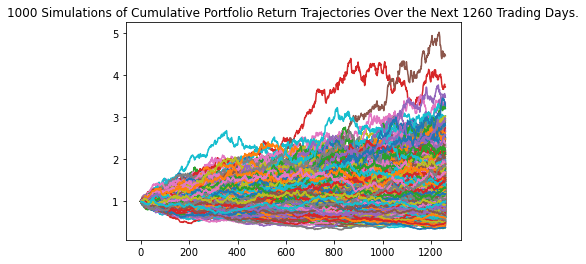

In [20]:
# Plot simulation outcomes
nike_line_plot = MC_nike.plot_simulation()

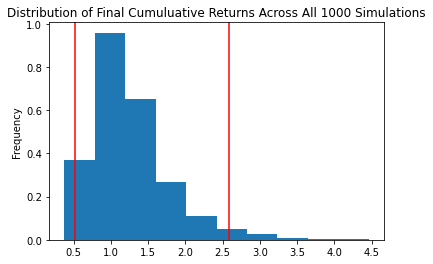

In [21]:
# Plot probability distribution and confidence intervals
nike_dist_plot = MC_nike.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
nike_tbl = MC_nike.summarize_cumulative_return()


# Print summary statistics
print(nike_tbl)

count           1000.000000
mean               1.247070
std                0.521496
min                0.375167
25%                0.890532
50%                1.150719
75%                1.472544
max                4.459725
95% CI Lower       0.519636
95% CI Upper       2.586658
Name: 1260, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
nike_ci_lower = round(nike_tbl[8] * 15000, 2)
nike_ci_upper = round(nike_tbl[9] * 15000, 2)


# Print results
print(nike_ci_lower)
print(nike_ci_upper)

7794.53
38799.87


### Simulate five year portfolio growth with 60% Exxon stock

In [24]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_exxon = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.2, .2, .6],
    num_simulation = 1000,
    num_trading_days = 252 * 5
)

# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                   \
                            open    high     low  close    volume   
time                                                                
2016-05-12 00:00:00-04:00  57.52  58.340  57.310  58.00   7123201   
2016-05-13 00:00:00-04:00  57.74  58.120  57.280  57.30   6459816   
2016-05-16 00:00:00-04:00  57.27  57.530  56.630  57.14   7121946   
2016-05-17 00:00:00-04:00  57.15  57.375  56.650  57.10   6292280   
2016-05-18 00:00:00-04:00  56.76  56.870  55.670  56.11  10106392   
...                          ...     ...     ...    ...       ...   
2020-04-27 00:00:00-04:00  88.38  89.870  87.310  89.33   6204274   
2020-04-28 00:00:00-04:00  90.55  90.710  88.630  88.81   4483633   
2020-04-29 00:00:00-04:00  90.00  91.390  87.830  88.04   7944474   
2020-04-30 00:00:00-04:00  87.00  88.000  86.505  87.18   6528373   
2020-05-01 00:00:00-04:00  85.67  86.105  84.810  85.54   5357539   

                                            T                            \
                          daily_return   open     high     low    close   
time                                                                      
2016-05-12 00:00:00-04:00          NaN  39.30  39.6665  39.200  39.5600   
2016-05-13 00:00:00-04:00    -0.012069  39.47  39.5200  39.110  39.1463   
2016-05-16 00:00:00-04:00    -0.002792  38.95  39.2988  38.900  39.2800   
2016-05-17 00:00:00-04:00    -0.000700  39.24  39.3300  39.000  39.1000   
2016-05-18 00:00:00-04:00    -0.017338  39.09  39.1500  38.270  38.4400   
...                                ...    ...      ...     ...      ...   
2020-04-27 00:00:00-04:00     0.010635  29.99  30.6800  29.740  30.5400   
2020-04-28 00:00:00-04:00    -0.005821  31.00  31.1200  30.615  30.6500   
2020-04-29 00:00:00-04:00    -0.008670  31.13  31.8700  31.070  31.4400   
2020-04-30 00:00:00-04:00    -0.009768  31.00  31.0500  30.280  30.4500   
2020-05-01 00:00:00-04:00    -0.018812  30.77  30.7900  29.750  29.9000   

                                                    XOM                \
                             volume daily_return   open   high    low   
time                                                                    
2016-05-12 00:00:00-04:00  15796926          NaN  89.80  89.93  89.15   
2016-05-13 00:00:00-04:00  13723184    -0.010458  89.28  89.66  88.51   
2016-05-16 00:00:00-04:00  12318580     0.003415  89.20  89.67  89.00   
2016-05-17 00:00:00-04:00  17858661    -0.004582  89.27  89.91  89.16   
2016-05-18 00:00:00-04:00  22339324    -0.016880  89.80  90.00  88.65   
...                             ...          ...    ...    ...    ...   
2020-04-27 00:00:00-04:00  58376488     0.027937  43.59  44.32  42.23   
2020-04-28 00:00:00-04:00  55107142     0.003602  44.37  45.39  44.11   
2020-04-29 00:00:00-04:00  57547301     0.025775  46.26  47.60  46.16   
2020-04-30 00:00:00-04:00  63467447    -0.031489  47.68  47.68  45.77   
2020-05-01 00:00:00-04:00  69100348    -0.018062  45.63  46.39  43.00   

                                                           
                             close    volume daily_return  
time                                                       
2016-05-12 00:00:00-04:00  89.6799   8639479          NaN  
2016-05-13 00:00:00-04:00  88.6500   7369897    -0.011484  
2016-05-16 00:00:00-04:00  89.5600   6411291     0.010265  
2016-05-17 00:00:00-04:00  89.5200   7204222    -0.000447  
2016-05-18 00:00:00-04:00  89.3300   7582643    -0.002122  
...                            ...       ...          ...  
2020-04-27 00:00:00-04:00  43.9200  26955553     0.004115  
2020-04-28 00:00:00-04:00  44.9800  24393001     0.024135  
2020-04-29 00:00:00-04:00  47.4800  26882843     0.055580  
2020-04-30 00:00:00-04:00  46.4000  28454300    -0.022746  
2020-05-01 00:00:00-04:00  43.1700  32688912    -0.069612  

[1000 rows x 18 columns]

In [25]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000335,1.004227,1.014819,1.003188,1.008044,0.988596,1.008778,1.001380,0.995848,0.976119,...,1.003223,1.000013,0.997502,1.025937,0.994307,1.016270,1.014410,0.983901,0.998935,1.010312
2,1.000110,1.003839,1.008361,0.985376,1.003531,0.989517,1.018691,1.025358,1.003845,0.981244,...,0.987777,1.001736,0.996401,1.013073,0.991003,1.014771,0.985934,0.976345,0.984708,1.009184
3,1.013485,1.005221,1.008667,0.995583,1.006294,0.998565,1.028265,1.023893,0.990686,0.985844,...,0.977712,1.010062,1.007665,1.018983,0.993222,1.024516,0.985124,0.978744,0.982380,1.009610
4,0.988362,1.019032,1.014252,0.995832,1.021100,1.008673,1.025343,1.018840,0.991542,0.989735,...,0.996475,1.001737,1.014584,1.024398,0.992169,1.035241,0.977040,0.984114,0.991132,1.013242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.224063,0.483210,0.865456,0.537030,0.503688,0.899511,0.417591,0.876332,1.087253,1.353684,...,0.743301,0.437925,0.682453,0.679734,0.781472,1.353692,0.601520,0.849849,0.473434,0.489262
1257,0.224190,0.483428,0.855509,0.529092,0.512159,0.896951,0.420928,0.892090,1.079936,1.332845,...,0.748623,0.437905,0.683602,0.689820,0.771229,1.344444,0.601063,0.855374,0.474518,0.490062
1258,0.226492,0.483948,0.879909,0.538785,0.511745,0.885512,0.421911,0.887621,1.078069,1.325338,...,0.762362,0.438339,0.691357,0.698757,0.775805,1.325342,0.589541,0.839988,0.470562,0.486162
1259,0.226423,0.490334,0.886443,0.537824,0.505595,0.884884,0.421443,0.877414,1.062730,1.301221,...,0.768985,0.437062,0.685299,0.702673,0.780273,1.337280,0.583291,0.833999,0.472702,0.496908


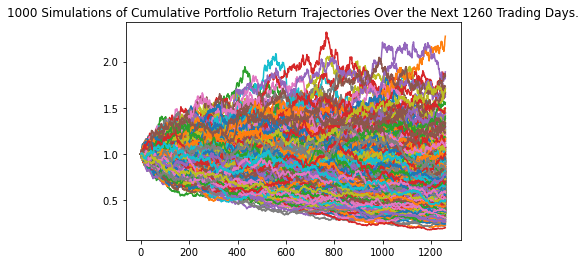

In [26]:
# Plot simulation outcomes
exxon_line_plot = MC_exxon.plot_simulation()

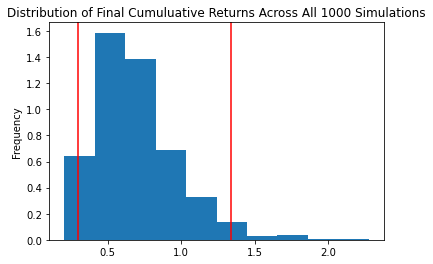

In [27]:
# Plot probability distribution and confidence intervals
exxon_dist_plot = MC_exxon.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
exxon_tbl = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_tbl)

count           1000.000000
mean               0.694176
std                0.274619
min                0.206837
25%                0.500365
50%                0.647165
75%                0.833845
max                2.273192
95% CI Lower       0.300629
95% CI Upper       1.335745
Name: 1260, dtype: float64


In [29]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
exxon_ci_lower = round(exxon_tbl[8] * 15000, 2)
exxon_ci_upper = round(exxon_tbl[9] * 15000, 2)



# Print results
print(exxon_ci_lower)
print(exxon_ci_upper)

4509.43
20036.18


### Summarize findings across all 4 simulations

In [30]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("*"*50)

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("*"*50)

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("*"*50)

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("*"*50)

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6823.21 and $23175.18.
**************************************************
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $5818.93 and $25138.57.
**************************************************
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7794.53 and $38799.87.
**************************************************
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $4509.43 and $20036.18.
**************************************************
